# General How Clustering Works

In [1]:
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]
data = data[pyrandom.sample(range(len(data)),len(data))]

In [3]:
data

array([[54.90348062, 35.30369944],
       [28.51484885, 70.05602006],
       [-0.30283454, 28.05655311],
       ...,
       [ 9.01757703, 13.54821474],
       [39.52559305, 75.64255866],
       [28.09878231,  5.94256535]])

In [4]:
data.shape

(3000, 2)

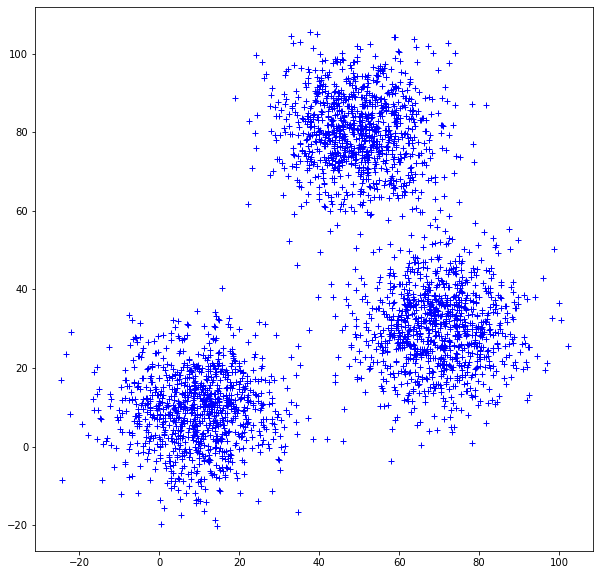

In [5]:
figsize(10,10)
plot(data[:,0],data[:,1],'+b')

In [9]:
# Introduce centroid or random points

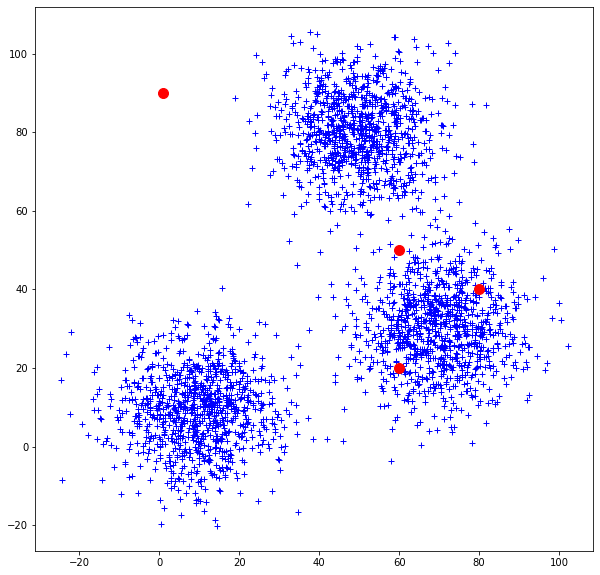

In [7]:
protos = array([[80,40],[60,20],[1,90],[60,50]]) # Initialize centroids
start = protos.copy()

figsize(10,10)
plot(data[:,0],data[:,1],'b+')
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [8]:
protos

array([[80, 40],
       [60, 20],
       [ 1, 90],
       [60, 50]])

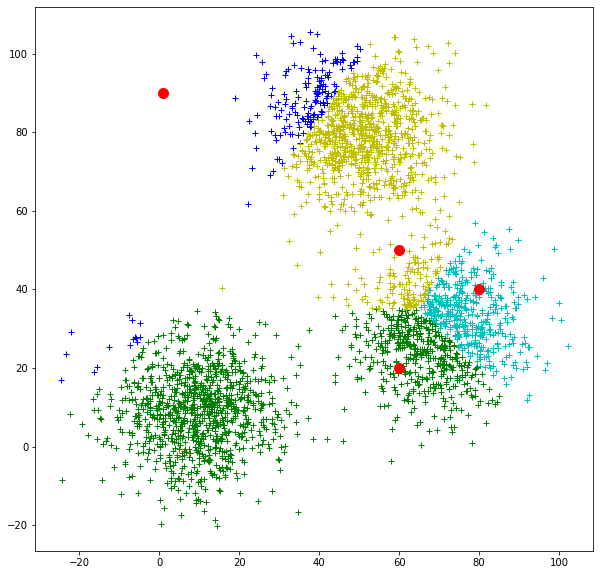

In [9]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
    plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [10]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(data[closest==i],axis=0)
    
history.append(protos.copy())

In [11]:
#Find the centroid

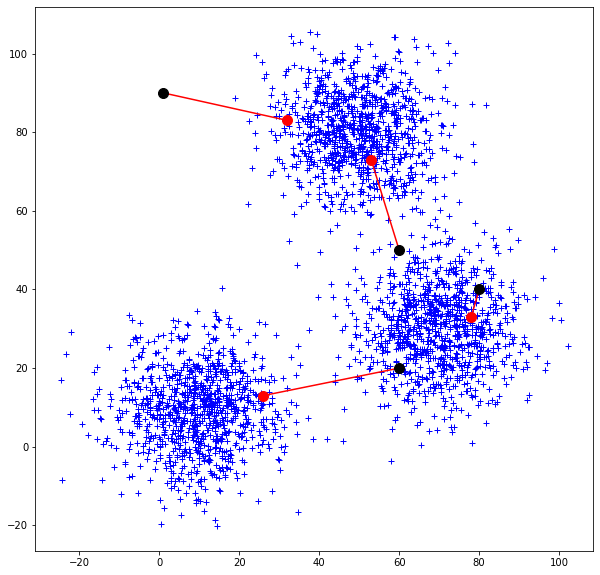

In [12]:
# Plotting the centroid movements
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],'r')
plot(harray[0,:,0],harray[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [13]:
#Repeat this step untill we can 4 no. of clusters finely

As you can see, the centers have moved, and it looks like they have generally moved in the right direction.

Now let's just repeat this process multiple times

In [14]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(data[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

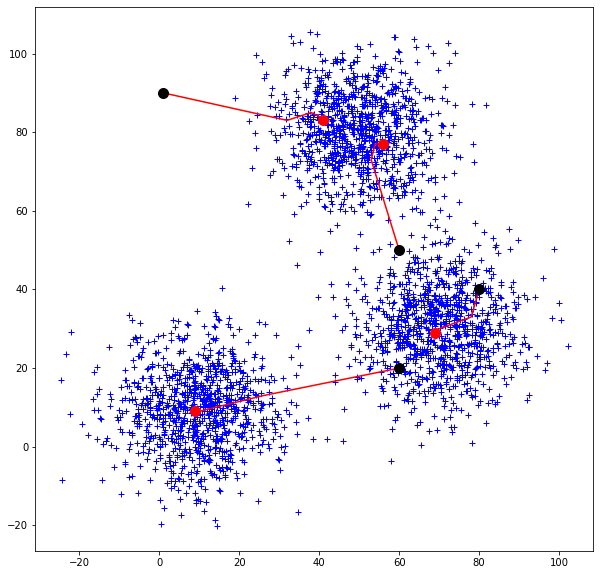

In [16]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

As you can see, the final location of the prototype centers (red) are nicely in the center of the classes. The algorithm doesn't give us exactly the cluster centers because there are three clusters but we postulated four cluster centers.

We can also look at the partition of the data induced by these cluster centers.

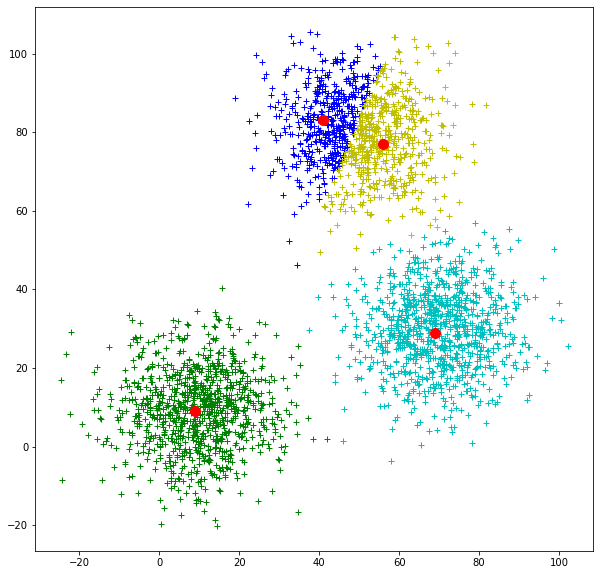

In [17]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

### K-Means Clustering Code

In [22]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
dataset=pd.read_csv('Mall_Customers.csv')

In [24]:
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
#dataset
X = dataset.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


C:\Users\jatpradh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


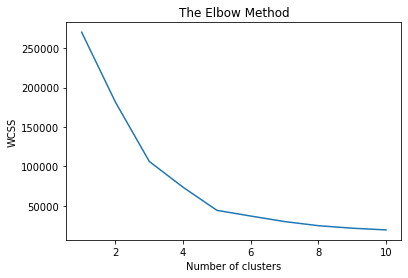

In [26]:
#Elbow method - wcss vs K value
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25011.839349156595,
 21850.16528258562,
 19672.07284901432]

In [25]:
# Here we can take k=5

In [69]:
# Fitting K-Means to  the dataset
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [70]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [71]:
# We can separate the clusters output with different Names - Say A,B,C....etc

In [72]:
# Test a data point
test = kmeans.predict(np.asarray([[80,100]]))
test[0]

4

In [73]:
# A separate datapoint randomly outside this data


In [74]:
test = kmeans.predict(np.asarray([[10,12]]))
test[0]

2

In [75]:
test = kmeans.predict(np.asarray([[100,120]]))
test

array([4])

In [76]:
# saving the model to the local file system
import pickle
filename = 'k-mean_model.pickle'
pickle.dump(kmeans, open(filename, 'wb'))

In [77]:
# Looking at the points which belong to Cluster0
X[y_kmeans==3]

,Annual Income (k$),Spending Score (1-100)
1,15,81
3,16,77
5,17,76
7,18,94
9,19,72
11,19,99
13,20,77
15,20,79
17,21,66
19,23,98


In [78]:
X[y_kmeans==1].shape

(35, 2)

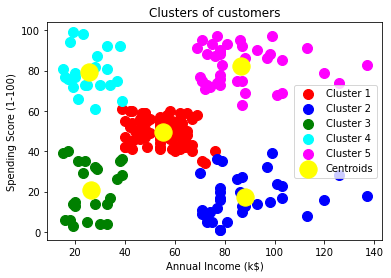

In [79]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Hierarchichal Clustering

#### Example - 1

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [65]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


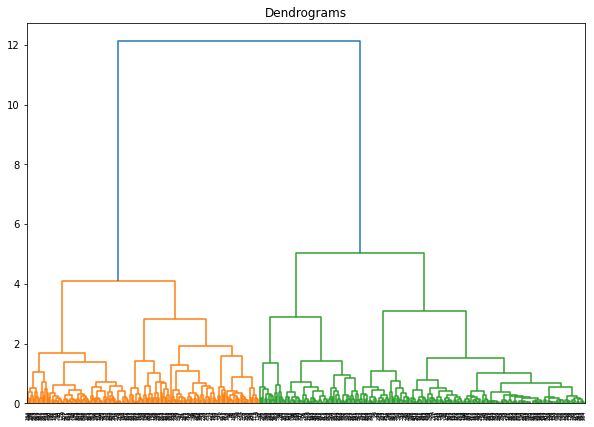

In [66]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

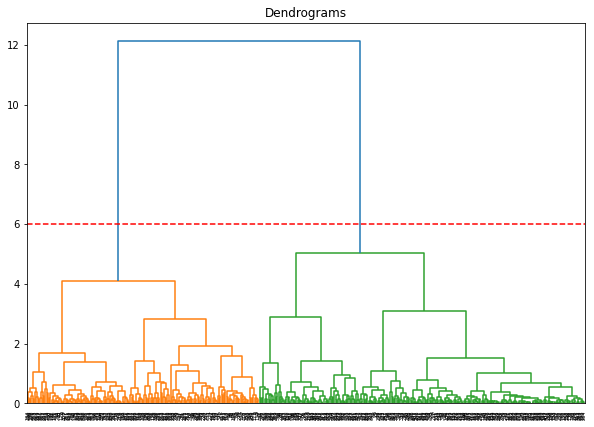

In [72]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [75]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

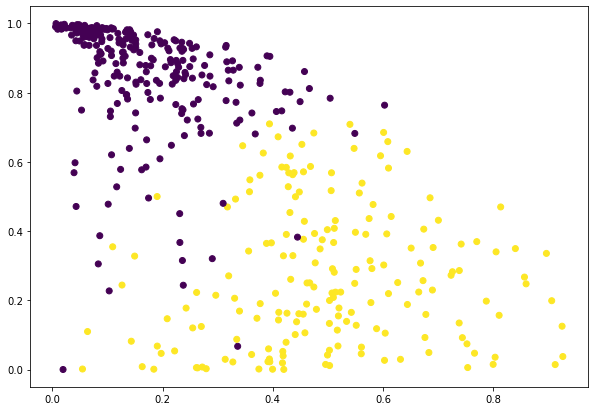

In [76]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Fresh'], c=cluster.labels_) 

#### Example -2 

In [3]:
# Importing the necessary libraries
import random as pyrandom
from scipy.spatial.distance import cdist
figsize(6,6)

In [4]:
#Defining a method to plot the clusters
ccolors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)

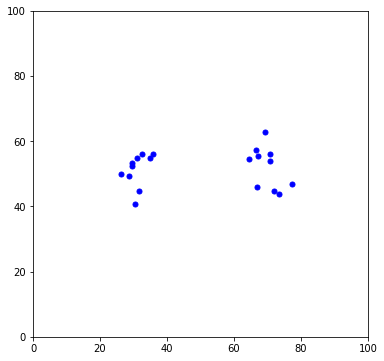

In [13]:
# A Simple Clustering Problem
data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]
# shuffle(data)
plotclusters(data)

In [17]:
data.shape

(20, 2)

In [18]:
data

array([[72.0530209 , 44.59351163],
       [70.62051292, 53.82795212],
       [70.75909895, 56.01262485],
       [64.63621492, 54.36028965],
       [77.36127624, 46.7123478 ],
       [73.35001732, 43.69599912],
       [67.16023404, 55.4107671 ],
       [66.8771336 , 45.79032055],
       [66.57915667, 57.31283801],
       [69.152387  , 62.82499874],
       [32.47921393, 56.04219798],
       [26.19547693, 49.88338855],
       [30.54788797, 40.84638094],
       [29.569446  , 52.46091772],
       [35.83112265, 56.02187152],
       [34.92319078, 54.6745176 ],
       [31.03384117, 54.68497646],
       [29.4245062 , 53.16957349],
       [31.58505478, 44.71227313],
       [28.58117262, 49.27157337]])

In [16]:
# Compute distance between each pair of the two collections of inputs,i.e.,calculate distance between all the points in data
from scipy.spatial.distance import cdist
ds = cdist(data,data)
ds

array([[ 0.        ,  9.34489006, 11.49218781, 12.26372553,  5.71550886,
         1.57725344, 11.87233672,  5.31245339, 13.84718214, 18.46079086,
        41.19658503, 46.16164141, 41.67393728, 43.20590486, 37.98201315,
        38.47402976, 42.2422865 , 43.4826299 , 40.46814039, 43.7228299 ],
       [ 9.34489006,  0.        ,  2.18906396,  6.00792858,  9.80151595,
        10.49317234,  3.8051062 ,  8.86658953,  5.3363836 ,  9.11604309,
        38.20551758, 44.59981395, 42.12287336, 41.07382229, 34.85849907,
        35.70735891, 39.59594765, 41.20126735, 40.08569065, 42.28553795],
       [11.49218781,  2.18906396,  0.        ,  6.34191773, 11.40543283,
        12.58618795,  3.64884384, 10.9345855 ,  4.37749606,  6.99928291,
        38.27989645, 44.9831518 , 42.97623114, 41.34249791, 34.92797752,
        35.86088182, 39.7474371 , 41.43225192, 40.77135864, 42.71322096],
       [12.26372553,  6.00792858,  6.34191773,  0.        , 14.84648781,
        13.77161736,  2.73389382,  8.85810853,  

In [41]:
from scipy.cluster.hierarchy import *
lm = linkage(ds,"single")
lm

<ipython-input-41-bb8d7851ac23>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  lm = linkage(ds,"single")


array([[  0.        ,   7.        ,   2.88910142,   2.        ],
       [ 17.        ,  18.        ,   3.95780809,   2.        ],
       [  6.        ,   9.        ,   4.02577999,   2.        ],
       [ 10.        ,  13.        ,   5.47623762,   2.        ],
       [  1.        ,  20.        ,   5.54024814,   3.        ],
       [ 15.        ,  23.        ,   5.74768178,   3.        ],
       [  3.        ,   5.        ,   5.85690776,   2.        ],
       [ 12.        ,  21.        ,   5.90762079,   3.        ],
       [ 16.        ,  27.        ,   6.72140133,   4.        ],
       [ 24.        ,  26.        ,   7.18175608,   5.        ],
       [ 19.        ,  28.        ,   8.6025057 ,   5.        ],
       [ 22.        ,  29.        ,  10.43160758,   7.        ],
       [  2.        ,   4.        ,  11.24287873,   2.        ],
       [  8.        ,  31.        ,  11.61200608,   8.        ],
       [ 11.        ,  30.        ,  13.20461201,   6.        ],
       [ 32.        ,  33

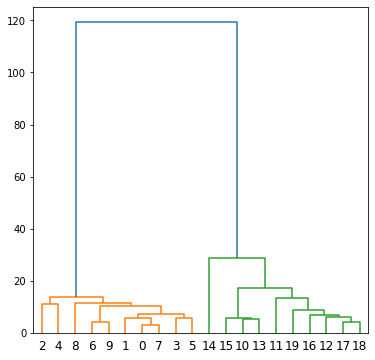

In [43]:
_=dendrogram(lm)

In [44]:
fcluster(lm,2,criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

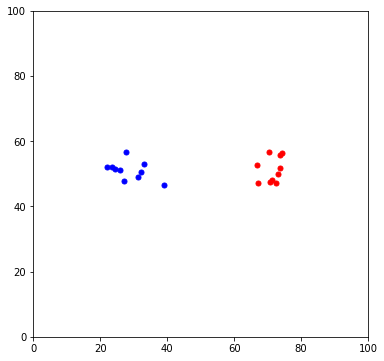

In [45]:
# Plotting the individual clusters
plotclusters(data,fcluster(lm,2,criterion='maxclust'))

### DBSCAN

#### Example -1 

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")

In [78]:
data.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [79]:
data.shape

(200, 5)

In [80]:
data.isnull().any().any()

False

In [27]:
# extracting the above mentioned columns
x = data.loc[:, ['Annual Income (k$)',
                 'Spending Score (1-100)']].values

In [28]:
x.shape

(200, 2)

Before we apply the DBSCAN model, first, we need to obtain its two parameters.

1 ) MinPoints: 

> If the dataset has two dimensions, use the min sample per cluster as 4.

> If the data has more than two dimensions, : Min_sample(MinPoints) = 2 * Data dimension

2 ) Epsilon (Eps): 

>To calculate the value of Eps, we shall calculate the distance between each data point to its closest neighbor using the Nearest Neighbours. 

>After that, we sort them and finally plot them. From the plot, we identify the maximum value at the curvature of the graph. This value is our Eps.

In [29]:
# Compute data proximity from each other using Nearest Neighbours
# Source - https://www.section.io/engineering-education/dbscan-clustering-in-python/

from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

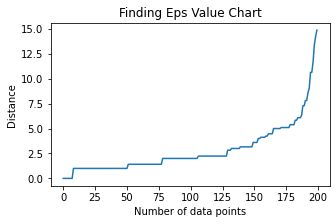

In [30]:
# Sorting and plot the distances between the data points

distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.title('Finding Eps Value Chart')
plt.xlabel('Number of data points')
plt.ylabel('Distance')
plt.show() # showing the plot

From the above plot, we note the maximum curvature of the curve is about eight, and thus we picked our Eps as 8.

We now have our two parameters as:

MinPoints = 4

Eps = 8

In [31]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

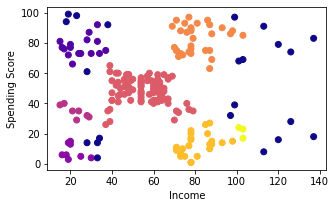

In [32]:
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot

#### Example - 2 

In [81]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [82]:
# Data creation
centers = [[1, 1], [-1, -1], [1, -1]]  
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)  # generate sample blobs

X = StandardScaler().fit_transform(X)

In [83]:
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [96]:
# DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

# we are calculating these for showcasing in diagram
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # creating an array of true and false as the same size as db.labels
core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True
labels = db.labels_  # similar to the model.fit() method, it gives the labels of the clustered data

In [97]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)  # calculating the number of clusters

In [98]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

"""Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


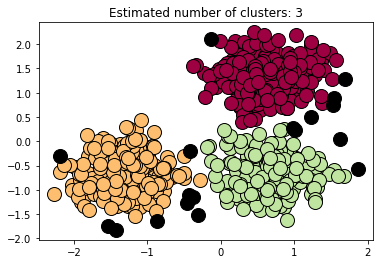

In [99]:
# Plot result
import matplotlib.pyplot as plt

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Evaluation  of Clustering

#### Rand Index

In [100]:
print("Rand Index : ",metrics.adjusted_rand_score(labels_true,labels))

Rand Index :  0.9517085526151922


#### Jaccadri Coefficient

In [101]:
#metrics.jaccard_similarity_score(labels_true,labels)
# metrics.jaccard_score(labels_true,labels,average='samples')
# metrics.jaccard_score(labels_true,labels,average='macro')
metrics.jaccard_score(labels_true,labels,average=None)

array([0.        , 0.96414343, 0.96812749, 0.97211155])

#### Purity Score

In [102]:
### purity score
import numpy as np
from sklearn import metrics

def purity_score(y_true,y_pred):
    # compute contingency matrix ( also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true,y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix,axis=0)) / np.sum(contingency_matrix)

In [103]:
purity_score(labels_true,labels)

0.9813333333333333

In [51]:
# A high value of purity score means that our clustering algorithm performs well against the ground truth 

In [52]:
metrics.silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

#### Silhoutte Score 

Here is the code calculating the silhouette score for K-means clustering model created with N = 3 (three) clusters using Sklearn IRIS dataset.

** Change No. of Clusters and try to check the score

In [109]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#
# Load IRIS dataset
#
iris = datasets.load_iris()
X = iris.data
y = iris.target
#
# Instantiate the KMeans models
#
km = KMeans(n_clusters=2, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(X)
#
# Calculate Silhoutte Score
#
score = silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.681


In [110]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])